# DAILY WHOLESALE PRICES CANADA

Provides daily ranges of domestic and imported horticultural commodities offered for sale. All quoted prices are supplied by a select surveyed group of wholesalers operating in that specific market. The price quoted represent the wholesalers 'asking price' to the retail level for a commodity and does not represent any arrangements or deals. The information provides for commodities, varieties, origins, pack weight or count and price range.

Source: https://open.canada.ca/data/en/dataset/920bc8e2-de26-4bf6-ac41-ed47962d0ff6

## Import dependencies, load data into dataframe

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('./DailyWholesalePrices_PrixDeGrossistesQuotidiens.csv')

## Explore data, data wrangling

In [ ]:
# df.columns
# df

,Date,CentreEn_CentreAn,CentreFr_CentreFr,CmdtyEn_PrdtAn,CmdtyEn_PrdtFr,VrtyEn_VrteAn,VrtyFr_VrteFr,GradeEn_CtgryAn,GradeFr_CtgryFr,Cntry_Pays,...,PkgTypeEn_EmpqtgAn,PkgTypeFr_EmpqtgFr,CntrTypeEn_TypeCntrAn,CntrTypeFr_TypeCntrFr,PkgQty_QtePqt,PkgWt_PdsPqt,UnitMsrEn_QteUnitAn,UnitMsrFr_QteUnitFr,PkgSizeEn_TaillePqtAn,PkgSizeFr_TaillePqtFr
0,2024-01-15,Wholesale-Montreal,Prix de gros-Montreal,ALFALFA SPROUTS,GERMES DE LUZERNE,ORGANIC-UNSPECIFIED,BIOLOGIQUE-INCONNUE,NaN,NaN,CA,...,Ctn 12X75 Gr,Ctn 12X75 Gr,Ctn,Ctn,12.0,75.00,Gr,Gr,NaN,NaN
1,2024-01-15,Wholesale-Toronto,Prix de gros-Toronto,ALFALFA SPROUTS,GERMES DE LUZERNE,UNSPECIFIED,INCONNUE,NaN,NaN,CA,...,Ctn 12X120 Gr,Ctn 12X120 Gr,Ctn,Ctn,12.0,120.00,Gr,Gr,NaN,NaN
2,2024-01-15,Wholesale-Toronto,Prix de gros-Toronto,APPLES,POMMES,AMBROSIA,AMBROSIE,Canada Number 1,Canada Numéro 1,CA,...,Ctn 40 lbs 64-72,Ctn 40 lbs 64-72,Ctn,Ctn,NaN,40.00,lbs,lbs,64-72,64-72
3,2024-01-15,Wholesale-Toronto,Prix de gros-Toronto,APPLES,POMMES,AMBROSIA,AMBROSIE,Canada Number 1,Canada Numéro 1,CA,...,Ctn 12X3 lbs,Ctn 12X3 lbs,Ctn,Ctn,12.0,3.00,lbs,lbs,NaN,NaN
4,2024-01-15,Wholesale-Montreal,Prix de gros-Montreal,APPLES,POMMES,AMBROSIA,AMBROSIE,United States Number 1,États-Unis Numéro 1,US,...,T/P 88,T/P 88,T/P,T/P,NaN,NaN,NaN,NaN,88,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197580,2025-01-27,Wholesale-Toronto,Prix de gros-Toronto,ZUCCHINI,ZUCCHINI,FIELD-GREEN,DES CHAMPS-VERTES,NaN,NaN,MX,...,Ctn 1.11 Bu,Ctn 1.11 Bu,Ctn,Ctn,NaN,1.11,Bu,Bu,NaN,NaN
197581,2025-01-27,Wholesale-Toronto,Prix de gros-Toronto,ZUCCHINI,ZUCCHINI,FIELD-GREEN,DES CHAMPS-VERTES,NaN,NaN,MX,...,Ctn 25 lbs,Ctn 25 lbs,Ctn,Ctn,NaN,25.00,lbs,lbs,NaN,NaN
197582,2025-01-27,Wholesale-Montreal,Prix de gros-Montreal,ZUCCHINI,ZUCCHINI,FIELD-YELLOW,DES CHAMPS-JAUNE,NaN,NaN,MX,...,Ctn 25 lbs,Ctn 25 lbs,Ctn,Ctn,NaN,25.00,lbs,lbs,NaN,NaN
197583,2025-01-27,Wholesale-Toronto,Prix de gros-Toronto,ZUCCHINI,ZUCCHINI,FIELD-YELLOW,DES CHAMPS-JAUNE,NaN,NaN,MX,...,Ctn 20 lbs,Ctn 20 lbs,Ctn,Ctn,NaN,20.00,lbs,lbs,NaN,NaN


In [5]:
# Removed columns that are duplicated with French translations. Use a list comprehension to get columns NOT ending in 'Fr'
columns_to_keep = [col for col in df.columns if not col.endswith('Fr')]

# Create a new DataFrame with only the selected columns
df = df[columns_to_keep]

# Rename columns to be more intuitive
column_mapping = {
    # Original Column                   # New Name
    'Date':                             'Date',
    'CentreEn_CentreAn':                'Center',
    'CmdtyEn_PrdtAn':                   'Commodity',
    'VrtyEn_VrteAn':                    'Variety',
    'GradeEn_CtgryAn':                  'Grade',
    'Cntry_Pays':                       'Country',
    'ProvState_ProvEtat':               'Province_State',
    'LowPrice_PrixMin':                 'Price_Low',
    'HighPrice_PrixMax':                'Price_High',
    'PkgTypeEn_EmpqtgAn':               'Package_Type',
    'CntrTypeEn_TypeCntrAn':            'Container_Type',
    'PkgQty_QtePqt':                    'Package_Qty',
    'PkgWt_PdsPqt':                     'Package_Weight',
    'UnitMsrEn_QteUnitAn':              'Unit_Measure',
    'PkgSizeEn_TaillePqtAn':            'Package_Size'
}

# Apply renaming
df = df.rename(columns=column_mapping)

# Convert dates and handle future dates
df['Date'] = pd.to_datetime(df['Date'])

# Added a column for the average price and the price range
df['AvgPrice'] = (df['Price_Low'] + df['Price_High']) / 2
df['PriceRange'] = df['Price_High'] - df['Price_Low']

In [54]:
# Get unique commodities and cities
print("Commodities available: ",df['Commodity'].unique())
print("Cities available: ",df['Center'].unique())
print("Number of commodities: ",df['Commodity'].unique().shape[0])

Commodities available:  ['ALFALFA SPROUTS' 'APPLES' 'APRICOTS' 'ARTICHOKES' 'ASPARAGUS' 'AVOCADOS'
 'BANANAS' 'BEAN SPROUTS' 'BEANS' 'BEETS' 'BLACKBERRIES' 'BLUEBERRIES'
 'BROCCOLI' 'BRUSSELS SPROUTS' 'CABBAGE' 'CALABAZA' 'CARROTS'
 'CAULIFLOWER' 'CELERY' 'CHAYOTE' 'CHERIMOYA' 'CHERRIES'
 'CHINESE VEGETABLES' 'COCONUTS' 'COLLARD' 'CORN' 'CRANBERRIES'
 'CUCUMBERS' 'DAIKON' 'DANDELION' 'DATES' 'EDDOES' 'EGGPLANT' 'ENDIVE'
 'ESCAROLE' 'FIGS' 'GARLIC' 'GINGER ROOT' 'GRANADILLA' 'GRAPEFRUIT'
 'GRAPES (TABLE)' 'HERBS (CULINARY)' 'JACKFRUIT' 'JICAMA ROOT' 'KALE'
 'KIWI FRUIT' 'KOHLRABI' 'KUMQUAT' 'LEEKS' 'LEMONS' 'LETTUCE' 'LIMES'
 'LYCHEE' 'MALANGA' 'MANDARINES' 'MANGOES' 'MELONS' 'MICROGREENS'
 'MUSHROOMS' 'NECTARINES' 'NUTS' 'OKRA' 'ONIONS' 'ORANGES' 'PAPAYA'
 'PARSNIPS' 'PASSION FRUIT' 'PEACHES' 'PEARS' 'PEAS' 'PEPPERS'
 'PERSIMMONS' 'PHYSALIS' 'PINEAPPLES' 'PITHAYA' 'PLUMS' 'POMEGRANATES'
 'POTATOES' 'QUINCES' 'RADISHES' 'RAMBUTAN' 'RAPPINI' 'RASPBERRIES'
 'RUTABAGAS' 'SALICORNIA' 'SALSI

In [7]:
# Convert units to kg and change the unit of measure to kg
conversion_factors = {'lbs': 0.453592, 'Gr': 0.001, 'Oz': 0.02835}
for unit, factor in conversion_factors.items():
    mask = df['Unit_Measure'] == unit
    df.loc[mask, 'AvgPrice'] *= factor
    df.loc[mask, 'Unit_Measure'] = 'kg'

### Data Analysis - Average Price

In [25]:
# Group by commodity and calculate average price and show units of measure in same dataframe
df_avg_price = df.groupby('Commodity')['AvgPrice'].mean().round(2)
df_avg_price_units = df.groupby('Commodity')['Unit_Measure'].first()
df_avg_price = pd.concat([df_avg_price, df_avg_price_units], axis=1)

# Drop commodities with no units of measure
df_avg_price = df_avg_price.dropna()

# Price volatility by commodity
df_avg_price['Volatility'] = df.groupby('Commodity')['PriceRange'].std().round(2)

df_avg_price.sort_values('Volatility', ascending=False) # Sort by volatility
# df_avg_price.sort_values('AvgPrice') # Sort by average price


,AvgPrice,Unit_Measure,Volatility
Commodity,,,
LIMES,41.39,kg,12.36
LEMONS,36.88,kg,10.49
RAMBUTAN,20.52,kg,10.46
GINGER ROOT,33.84,kg,9.44
ARTICHOKES,33.68,kg,8.70
...,...,...,...
SOUR SOP,27.62,kg,0.00
SWEET POTATOES,15.33,kg,0.00
MANGOSTEEN,124.14,kg,0.00


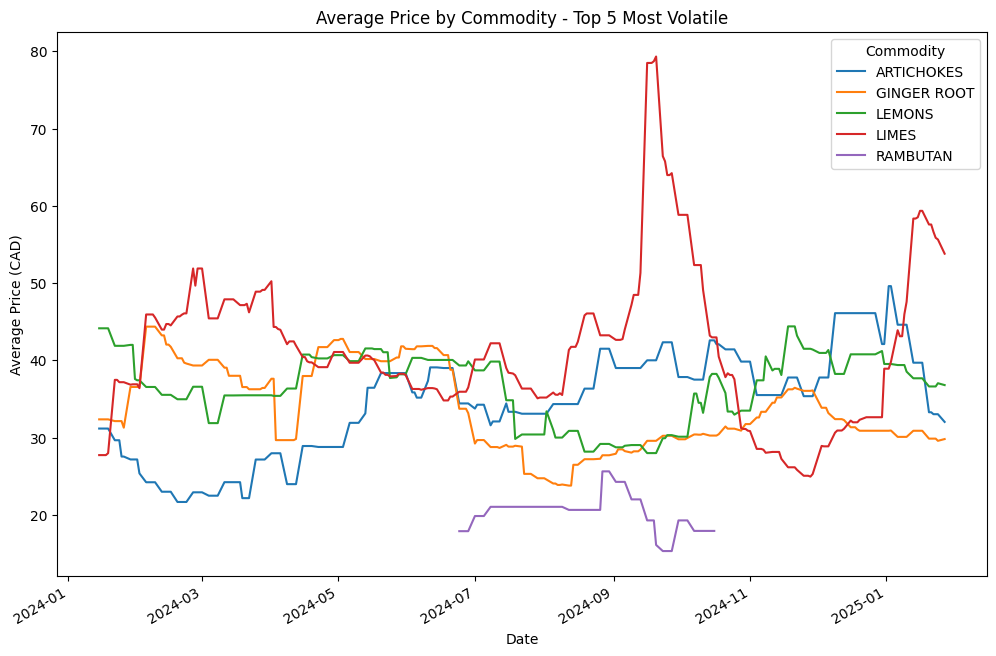

In [39]:
# Plot the average price by commodity over time for the top 5 most volatile commodities
most_volatile_commodities = df_avg_price.sort_values('Volatility', ascending=False).head(5).index
df_volatile = df[df['Commodity'].isin(most_volatile_commodities)]
df_volatile = df_volatile.groupby(['Commodity', 'Date'])['AvgPrice'].mean().unstack('Commodity')

df_volatile.plot(figsize=(12, 8))
plt.ylabel('Average Price (CAD)')
plt.title('Average Price by Commodity - Top 5 Most Volatile')
plt.legend(title='Commodity')
plt.show()


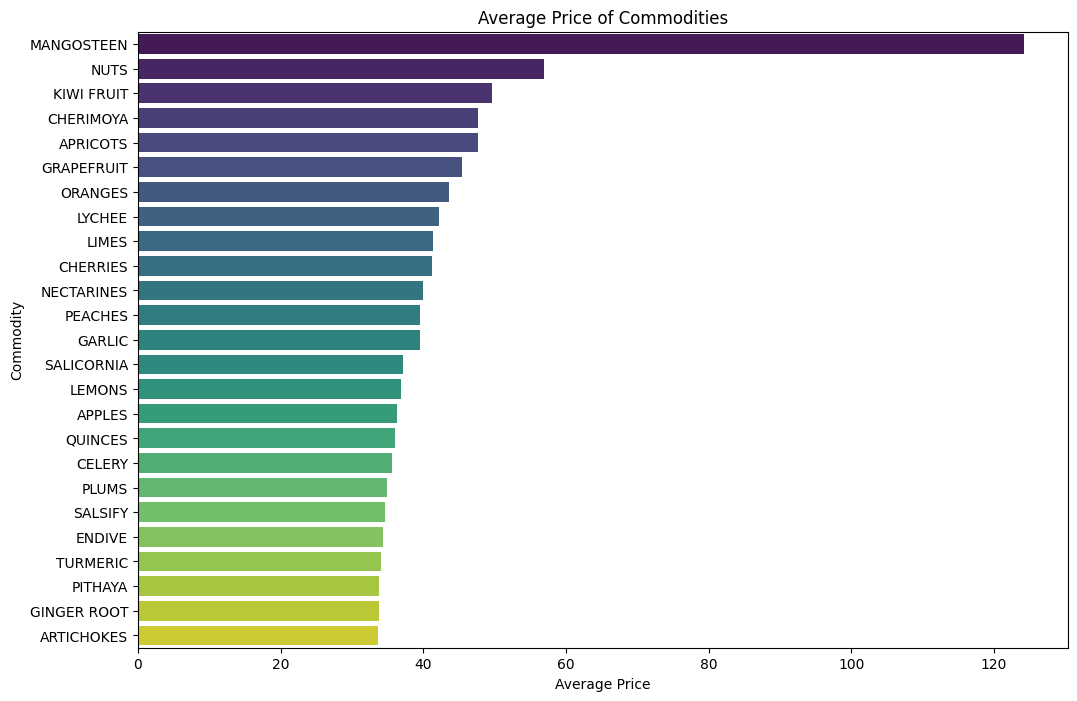

In [69]:
# Sort df_avg_price by AvgPrice in descending order
df_avg_price_sorted = df_avg_price.sort_values(by='AvgPrice', ascending=False).iloc[:25]

# Plot df_avg_price_sorted as a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='AvgPrice', y=df_avg_price_sorted.index, data=df_avg_price_sorted.reset_index(), palette='viridis')
plt.xlabel('Average Price')
plt.ylabel('Commodity')
plt.title('Average Price of Commodities')
plt.show()

In [ ]:
# Categorized commodities
produce_categories = {
    'Citrus Fruits': ['GRAPEFRUIT', 'LEMONS', 'LIMES', 'MANDARINES', 'ORANGES', 'TANGERINES', 'PUMMELO'],
    'Berries': ['BLACKBERRIES', 'BLUEBERRIES', 'CRANBERRIES', 'STRAWBERRIES', 'RASPBERRIES'],
    'Tropical Fruits': ['MANGOES', 'PINEAPPLES', 'PAPAYA', 'KIWI FRUIT', 'LYCHEE', 'TAMARILLO', 'RAMBUTAN', 
                         'MANGOSTEEN', 'CARAMBOLA', 'BREADFRUIT'],
    'Stone Fruits': ['APRICOTS', 'PEACHES', 'PLUMS', 'NECTARINES', 'CHERRIES'],
    'Other Fruits': ['APPLES', 'PEARS', 'GRAPES (TABLE)', 'PERSIMMONS', 'QUINCES', 'UGLY FRUIT', 'PHYSALIS'],
    
    'Leafy Greens': ['KALE', 'LETTUCE', 'SWISS CHARD', 'ENDIVE', 'ESCAROLE', 'COLLARD', 'DANDELION', 'SPINACH'],
    'Root Vegetables': ['CARROTS', 'BEETS', 'DAIKON', 'JICAMA ROOT', 'PARSNIPS', 'RUTABAGAS', 'YAMS', 'SWEET POTATOES', 'TURNIPS'],
    'Cruciferous Vegetables': ['BROCCOLI', 'BRUSSELS SPROUTS', 'CAULIFLOWER', 'KOHLRABI', 'RAPPINI'],
    'Squash & Gourds': ['CALABAZA', 'SQUASH', 'PUMPKINS', 'ZUCCHINI'],
    'Alliums': ['GARLIC', 'ONIONS', 'LEEK', 'SHALLOTS'],
    'Peppers': ['PEPPERS'],
    'Exotic/Other Vegetables': ['CHAYOTE', 'CHINESE VEGETABLES', 'SALICORNIA', 'SALSIFY', 'YUCCA'],
    
    'Herbs & Spices': ['HERBS (CULINARY)', 'FENUGREEK', 'GINGER ROOT', 'TURMERIC'],
    'Sprouts & Microgreens': ['ALFALFA SPROUTS', 'BEAN SPROUTS', 'MICROGREENS'],
    'Nuts': ['NUTS'],
    'Exotic Fruits & Others': ['CHERIMOYA', 'GRANADILLA', 'JACKFRUIT', 'MALANGA', 'PASSION FRUIT', 'PHYSALIS', 'PITHAYA', 'SOUR SOP']
}

In [ ]:
# Function to get produce category
def get_produce_category(commodity):
  for category, commodities in produce_categories.items():
    if commodity in commodities:
      return category
  return 'Other'  # Default category for commodities not in the dictionary

# Apply the function to create a new 'ProduceCategory' column
df['ProduceCategory'] = df['Commodity'].apply(get_produce_category)
df[['Date', 'Center', 'Commodity', 'ProduceCategory', 'AvgPrice']]

,Date,Center,Commodity,ProduceCategory,AvgPrice
0,2024-01-15,Wholesale-Montreal,ALFALFA SPROUTS,Sprouts & Microgreens,0.018500
1,2024-01-15,Wholesale-Toronto,ALFALFA SPROUTS,Sprouts & Microgreens,0.024500
2,2024-01-15,Wholesale-Toronto,APPLES,Other Fruits,22.679600
3,2024-01-15,Wholesale-Toronto,APPLES,Other Fruits,26.421734
4,2024-01-15,Wholesale-Montreal,APPLES,Other Fruits,39.750000
...,...,...,...,...,...
197580,2025-01-27,Wholesale-Toronto,ZUCCHINI,Squash & Gourds,39.000000
197581,2025-01-27,Wholesale-Toronto,ZUCCHINI,Squash & Gourds,15.875720
197582,2025-01-27,Wholesale-Montreal,ZUCCHINI,Squash & Gourds,19.050864
197583,2025-01-27,Wholesale-Toronto,ZUCCHINI,Squash & Gourds,15.875720


In [47]:
# See how the price vary between Centers: Wholesale-Toronto and Wholesale-Montreal
# Group by Center and ProduceCategory and calculate average price
df_center_category = df.groupby(['Center', 'ProduceCategory'])['AvgPrice'].mean().unstack('Center')
df_center_category.tail()


Center,Wholesale-Montreal,Wholesale-Toronto
ProduceCategory,,
Root Vegetables,16.696023,24.539122
Sprouts & Microgreens,4.170656,2.875105
Squash & Gourds,22.269644,27.989991
Stone Fruits,40.239225,35.231388
Tropical Fruits,32.509310,29.957394


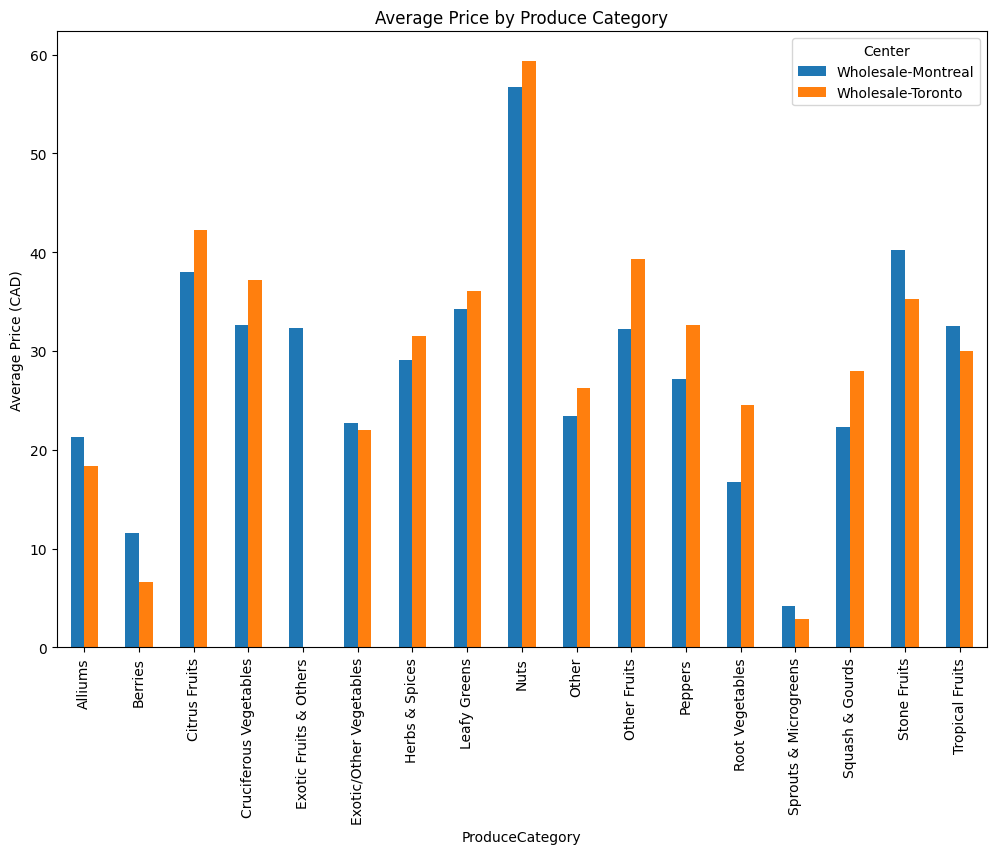

In [48]:
# Plot the average price by produce category for each center
df_center_category.plot(kind='bar', figsize=(12, 8))
plt.ylabel('Average Price (CAD)')
plt.title('Average Price by Produce Category')
plt.legend(title='Center')
plt.show()